<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Regression with Tensorflow & Keras

------


### OBJECTIVES

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save the model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sequential allows us to build neural networks by stacking layers linearly
from tensorflow.keras.models import Sequential

# Import core layer types from Keras:
# - Dense: Standard fully-connected neural network layer
# - Dropout: Randomly sets input units to 0 during training (prevents overfitting)
# - BatchNormalization: Normalizes and scales inputs for each mini-batch (improves training stability)
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

# Import regularization functions from Keras:
# - l1: Lasso Regularization (adds absolute value of weights to loss)
# - l2: Ridge Regularization (adds squared value of weights to loss) 
# - l1_l2: Elastic Net Regularization (combines both l1 and l2)
# All of these help prevent overfitting by penalizing large weights
from tensorflow.keras.regularizers import l1, l2, l1_l2

from sklearn.metrics import root_mean_squared_error

In [4]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

- Load in the California housing data into a Pandas DataFrame called `cali_df`.
- Add the target as a column named `price`

In [6]:
# create Dataframe
cali_df = pd.DataFrame(X, columns=cali.feature_names)
cali_df['price'] = y

In [7]:
# show sample value
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
# check null value
cali_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [9]:
# show value distribution
cali_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Part 2

- Create `X` from selected features (your choice) and set `y` as the `price` column
- Split `X` and y into training and test sets

In [11]:
# setup feature and target data
X = cali_df[['MedInc','HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]
y = cali_df['price']

In [12]:
# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)

In [13]:
# scale data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a `ReLU` activation for the hidden layer.

In [15]:
# show X shape
X_train_sc.shape

(16512, 6)

In [16]:
# setup model
model1 = Sequential([
                    Input(shape=(6,)),
                    Dense(24, activation='relu'),
                    Dense(1, activation='linear'),
                   ])

`Compile` the network using an adam optimizer and appropriate loss function with the mean squared error metric.

In [18]:
# compile the model
model1.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error']
             )

### Part 4

Fit the model on the training data with 100 epochs (and suppress the output with `verbose = 0`). Save the fit model to the variable `history`.

In [20]:
history1 = model1.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32, 
                    verbose=0, 
                    epochs=100)

### Part 5

Use matplotlib to create side-by-side subplots showing:

- Training loss vs validation loss
- Training mean squared error vs validation mean squared error
- You can plot these metrics from the training history.

In [22]:
def plot_model(model, history):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    # plot training loss vs validation loss#
    ax[0].plot(history.history['loss'], label='Training Loss')
    ax[0].plot(history.history['val_loss'], label='Validation Loss')
    ax[0].set_title('Training loss vs validation loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    
    ax[1].set_title('Training mean squared error vs validation mean squared error')
    ax[1].plot(history.history['mean_squared_error'], label='Training MSE')
    ax[1].plot(history.history['val_mean_squared_error'], label='Validation MSE')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('MSE')
    ax[1].legend()

    # show evaluate model MSE
    preds = model.predict(X_test, verbose=0)
    plt.suptitle(f'Model Testing RMSE: {round(root_mean_squared_error(y_test, preds), 4)}')
    plt.show()

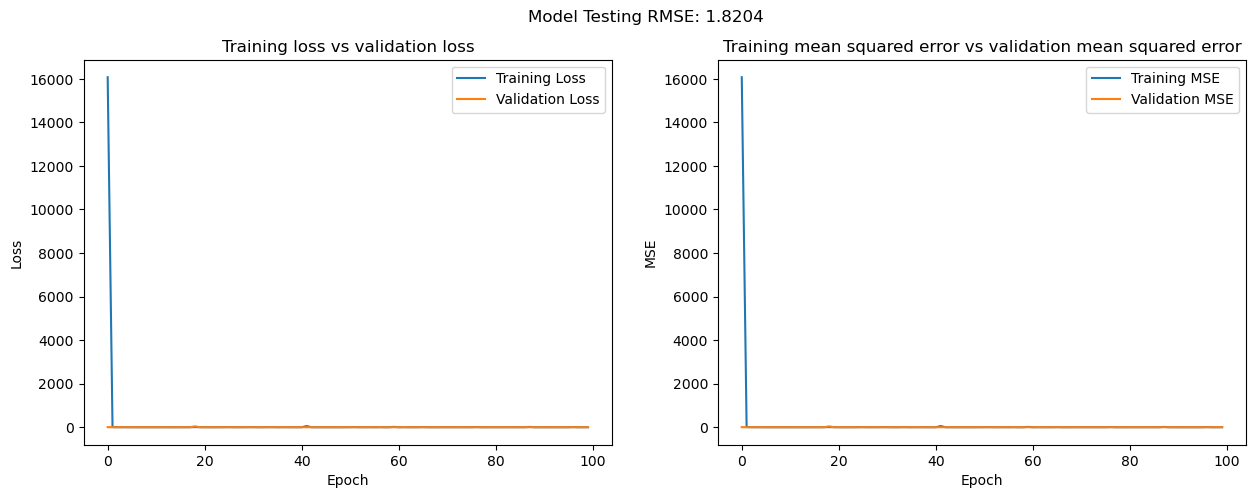

In [23]:
# show model fit result
plot_model(model1, history1)

### Part 6

Create a second, deeper network with the following architecture:

- First hidden layer: 64 nodes with ReLU activation
- Second hidden layer: 128 nodes with ReLU activation
- Third hidden layer: 64 nodes with ReLU activation
- Output layer: [appropriate nodes for your classification task]

In [25]:
# setup model
model2 = Sequential([
                    Input(shape=(6,)),
                    Dense(64, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(1, activation='linear'),
                   ])

In [26]:
# compile the model
model2.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error']
             )

In [27]:
history2 = model2.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32, 
                    verbose=0, 
                    epochs=100)

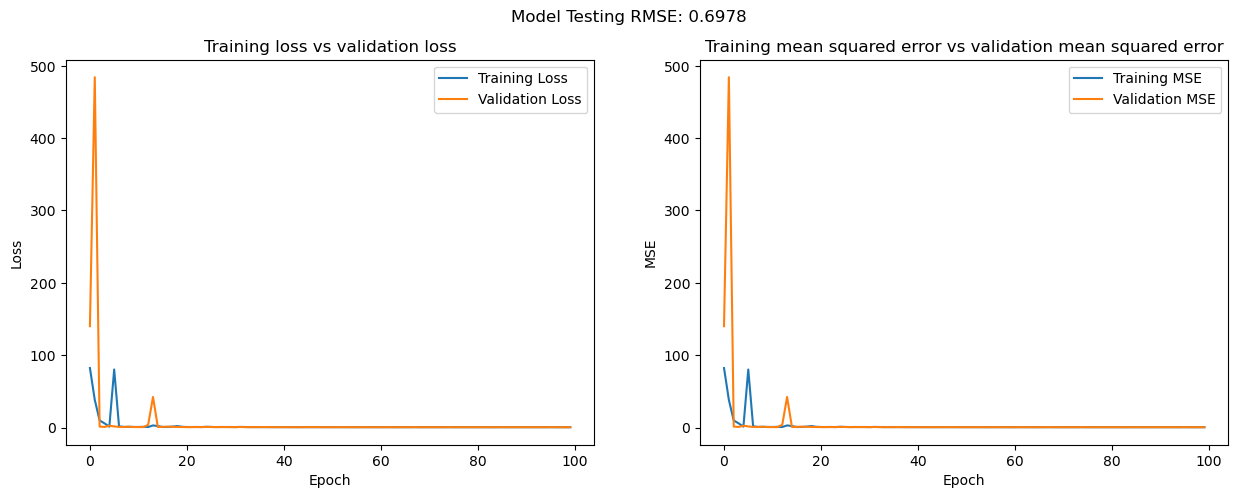

In [28]:
# show model fit result
plot_model(model2, history2)

### Part 7

Add a `BatchNormalization` layer before the first dense layer and retrain the model with the same parameters as before.

##### Does this change anything?

In [31]:
# setup model
model3 = Sequential([
                    Input(shape=(6,)),
                    BatchNormalization(),
                    Dense(64, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(1, activation='linear'),
                   ])

In [32]:
# compile the model
model3.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error']
             )

In [33]:
history3 = model3.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32, 
                    verbose=0, 
                    epochs=100)

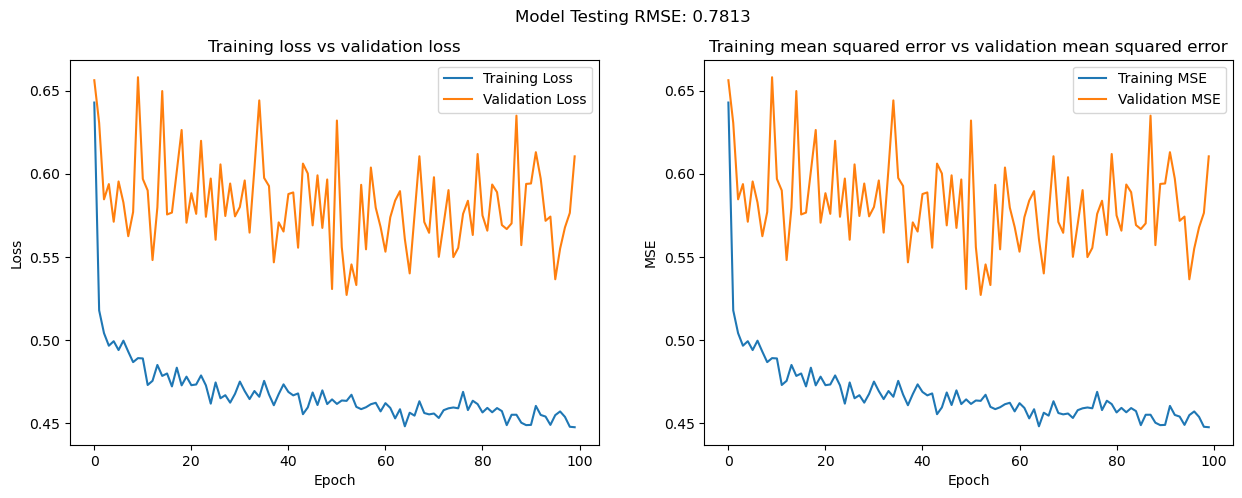

In [34]:
# show model fit result
plot_model(model3, history3)

### Part 8

**Early Stopping**  

Do we need 100 epochs to effectively train the data?  

- Iterate to now include an `EarlyStopping` callback in your model above.  
- Set the `patience` equal to 5.  


In [36]:
from keras.callbacks import EarlyStopping

model4 = Sequential([
                    Input(shape=(6,)),
                    BatchNormalization(),
                    Dense(64, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(1, activation='linear'),
                   ])

In [37]:
# compile the model
model4.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error']
             )

In [38]:
history4 = model4.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32, 
                    verbose=0, 
                    epochs=100,
                    callbacks=[EarlyStopping(patience=5)]
                   )

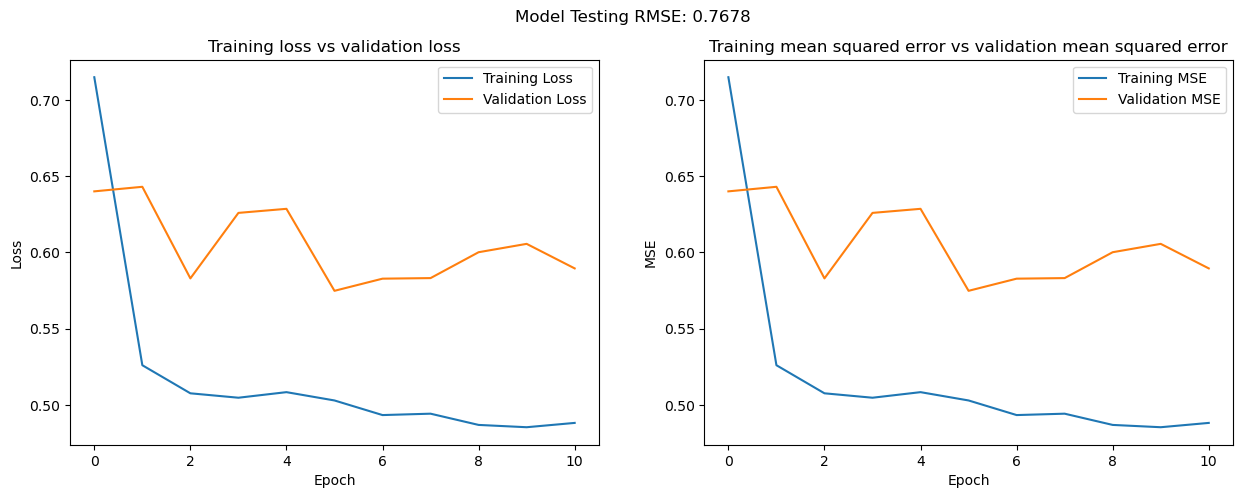

In [39]:
# show model fit result
plot_model(model4, history4)

**How many epochs do you think are appropriate?**

In [41]:
# show number of run epoch
len(history4.history['loss'])

11

### Part 9

**Dropout**  

- Add dropout layers to the model:
   - 5% dropout after the second layer
   - 20% dropout after the third layer
   - Train the model to compare **performance and convergence time**

In [43]:
# setup model
model5 = Sequential([
                    Input(shape=(6,)),
                    BatchNormalization(),
                    Dense(64, activation='relu'),
                    Dropout(0.05),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(64, activation='relu'),
                    Dense(1, activation='linear'),
                   ])

In [44]:
# compile the model
model5.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error']
             )

In [45]:
history5 = model5.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32, 
                    verbose=0, 
                    epochs=100,
                    callbacks=[EarlyStopping(patience=5)]
                   )

In [46]:
# show number of run epoch
len(history5.history['loss'])

25

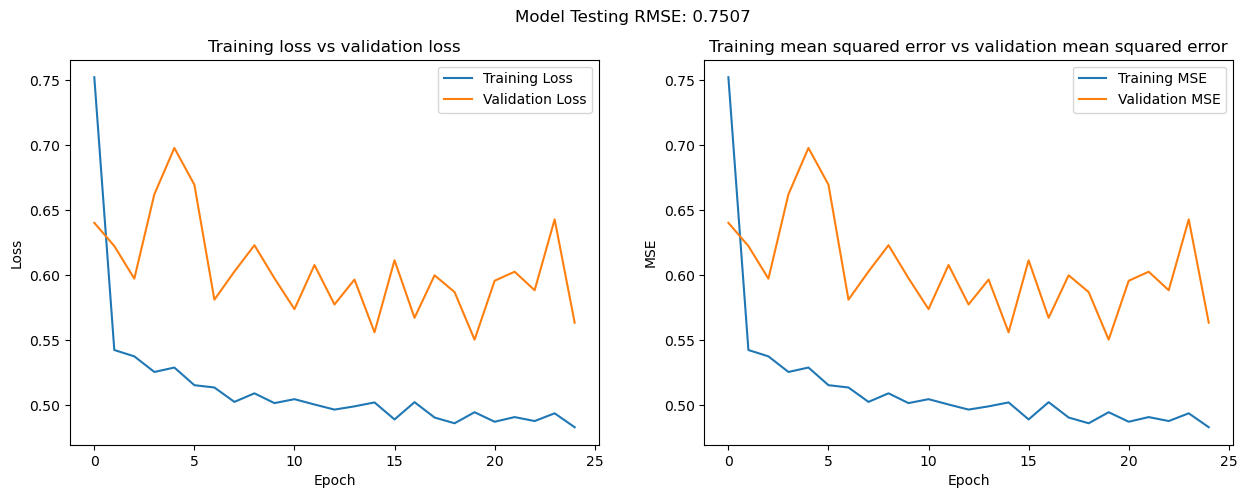

In [47]:
# show model fit result
plot_model(model5, history5)

- This model (model5) outperforms the baseline (model1) in terms of convergence speed and RMSE

### Part 9 - continued: RMSE vs. Baseline

Calculate and compare the RMSE of both the baseline model and your optimized model.

In [50]:
preds = model1.predict(X_test, verbose=0)
model_baseline = root_mean_squared_error(y_test, preds)

preds = model5.predict(X_test, verbose=0)
model_optimized = root_mean_squared_error(y_test, preds)

print(f'Baseline RMSE:{model_baseline:.4f}, Optimized RMSE:{model_optimized:.4f}')
print(f'Difference RMSE: {model_baseline - model_optimized:.4f}')

Baseline RMSE:1.8204, Optimized RMSE:0.7507
Difference RMSE: 1.0696


- Optimized model improves RMSE by 0.1292 over the baseline model

### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  

- Create a model with the same architecture and dropout layers
- Add l2 regularization (0.01) to **each** dense layer
- Calculate the RMSE and compare it against the baseline model

In [53]:
# setup model
model6 = Sequential([
                    Input(shape=(6,)),
                    BatchNormalization(),
                    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
                    Dropout(0.05),
                    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
                    Dropout(0.2),
                    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
                    Dense(1, activation='linear'),
                   ])

In [54]:
# compile the model
model6.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error']
             )

In [55]:
history6 = model6.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32, 
                    verbose=0, 
                    epochs=100,
                    callbacks=[EarlyStopping(patience=5)]
                   )

In [56]:
# show number of run epoch
len(history6.history['loss'])

16

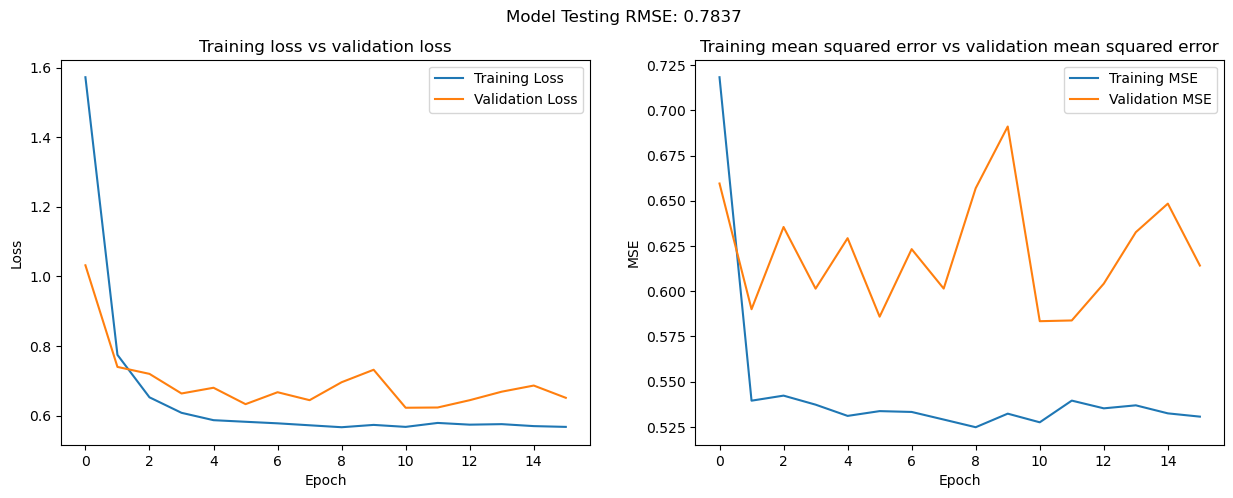

In [57]:
# show model fit result
plot_model(model6, history6)

In [58]:
preds = model1.predict(X_test, verbose=0)
model_baseline = root_mean_squared_error(y_test, preds)

preds = model6.predict(X_test, verbose=0)
model_optimized = root_mean_squared_error(y_test, preds)

print(f'Baseline RMSE:{model_baseline:.4f}, Optimized RMSE:{model_optimized:.4f}')
print(f'Difference RMSE: {model_baseline - model_optimized:.4f}')

Baseline RMSE:1.8204, Optimized RMSE:0.7837
Difference RMSE: 1.0367


- Optimized model improves RMSE by 0.1842 over the baseline model

### Part 11: Saving the Model

Save your best model in HDF5 format using `model.save(cali_housing.h5)`

In [1]:
from tensorflow.keras.models import save_model
# diable saving warning for legacy format
#save_model(model6, 'cali_housing.h5')

In [62]:
save_model(model6, 'cali_housing.keras')